In [1]:
import pandas as pd

ref_df = pd.read_csv("/home/mclougv/IDEAL_PDFF_prediction/training_data/IDEAL_X20254_clean_train.csv")

In [1]:
import pandas as pd

ref_df = pd.read_csv("training_data/IDEAL_X20254_clean_extracted_w_numpy.csv")
ref_df.shape

(33242, 17)

In [2]:
ref_df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,filename,eid,subfolder,liver_iron,PDFF,cT1,full_path,filename_from_path,eid_from_path,eid_from_filename,num_files,dicom_data_folder,numpy_dark_paths,numpy_light_paths,norm_PDFF
0,24051,24051,24051,4641679_20254_2_0.zip,4641679,32,1.2,6.6,634.0,/genetics3/mclougv/LIVER_MRI/raw_data_field_20...,4641679_20254_2_0.zip,4641679,4641679,73,/genetics3/mclougv/IDEAL_X20254/4641679_20254_2_0,/genetics3/mclougv/IDEAL_x20254_dark_files/464...,/genetics3/mclougv/IDEAL_x20254_light_files/46...,0.333018
1,9410,9410,9410,2402537_20254_2_0.zip,2402537,13,1.1,7.5,787.0,/genetics3/mclougv/LIVER_MRI/raw_data_field_20...,2402537_20254_2_0.zip,2402537,2402537,73,/genetics3/mclougv/IDEAL_X20254/2402537_20254_2_0,/genetics3/mclougv/IDEAL_x20254_dark_files/240...,/genetics3/mclougv/IDEAL_x20254_light_files/24...,0.516478
2,22520,22520,22520,4416283_20254_2_0.zip,4416283,30,1.2,1.2,749.0,/genetics3/mclougv/LIVER_MRI/raw_data_field_20...,4416283_20254_2_0.zip,4416283,4416283,73,/genetics3/mclougv/IDEAL_X20254/4416283_20254_2_0,/genetics3/mclougv/IDEAL_x20254_dark_files/441...,/genetics3/mclougv/IDEAL_x20254_light_files/44...,-0.767745
3,4370,4370,4370,1658628_20254_2_0.zip,1658628,6,1.2,1.8,656.0,/genetics3/mclougv/LIVER_MRI/raw_data_field_20...,1658628_20254_2_0.zip,1658628,1658628,73,/genetics3/mclougv/IDEAL_X20254/1658628_20254_2_0,/genetics3/mclougv/IDEAL_x20254_dark_files/165...,/genetics3/mclougv/IDEAL_x20254_light_files/16...,-0.645438
4,32638,32638,32638,5933012_20254_2_0.zip,5933012,43,1.2,3.6,703.0,/genetics3/mclougv/LIVER_MRI/raw_data_field_20...,5933012_20254_2_0.zip,5933012,5933012,73,/genetics3/mclougv/IDEAL_X20254/5933012_20254_2_0,/genetics3/mclougv/IDEAL_x20254_dark_files/593...,/genetics3/mclougv/IDEAL_x20254_light_files/59...,-0.278517


In [7]:
ref_df.sort_values(by="PDFF",inplace=True, ascending=True)

In [6]:
import numpy as np 
import matplotlib.pyplot as plt

def get_images(num_images, image_paths, slice_index = 0):
    image_data = list()
    index = 0
    while index < 9:
        numpy_file = image_paths[index]
        np_array = np.load(numpy_file)
    
        image = np_array[:,:,slice_index]
        image_data.append(image)
        index += 1

    return image_data

def plot_3by3(image_data):
    f, axarr = plt.subplots(3,3)
    axarr[0,0].imshow(image_data[0], cmap='gray')
    axarr[0,1].imshow(image_data[1], cmap='gray')
    axarr[0,2].imshow(image_data[2], cmap='gray')
    axarr[1,0].imshow(image_data[3], cmap='gray')
    axarr[1,1].imshow(image_data[4], cmap='gray')
    axarr[1,2].imshow(image_data[5], cmap='gray')
    axarr[2,0].imshow(image_data[6], cmap='gray')
    axarr[2,1].imshow(image_data[7], cmap='gray')
    axarr[2,2].imshow(image_data[8], cmap='gray')



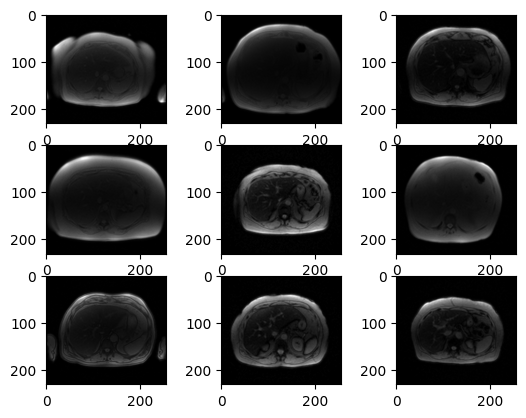

In [7]:
num_images = 9
ref_df.sort_values(by="PDFF",inplace=True, ascending=False)
fat_paths = ref_df["numpy_dark_paths"][:10].values
fat_image_data = get_images(num_images, fat_paths)
plot_3by3(fat_image_data)

['/genetics3/mclougv/IDEAL_x20254_dark_files/2898275_dark.npy'
 '/genetics3/mclougv/IDEAL_x20254_dark_files/1132054_dark.npy'
 '/genetics3/mclougv/IDEAL_x20254_dark_files/3000193_dark.npy'
 '/genetics3/mclougv/IDEAL_x20254_dark_files/3142513_dark.npy'
 '/genetics3/mclougv/IDEAL_x20254_dark_files/2580175_dark.npy'
 '/genetics3/mclougv/IDEAL_x20254_dark_files/4685218_dark.npy'
 '/genetics3/mclougv/IDEAL_x20254_dark_files/2353678_dark.npy'
 '/genetics3/mclougv/IDEAL_x20254_dark_files/2426476_dark.npy'
 '/genetics3/mclougv/IDEAL_x20254_dark_files/3518142_dark.npy'
 '/genetics3/mclougv/IDEAL_x20254_dark_files/3478917_dark.npy']


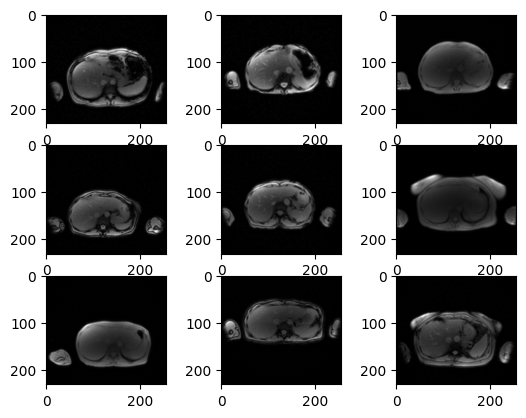

In [8]:
num_images = 9
paths = ref_df["numpy_dark_paths"][-10:].values
print(paths)
thin_image_data = get_images(num_images, paths)
plot_3by3(thin_image_data)

['/genetics3/mclougv/IDEAL_x20254_dark_files/1936212_dark.npy'
 '/genetics3/mclougv/IDEAL_x20254_dark_files/5405766_dark.npy'
 '/genetics3/mclougv/IDEAL_x20254_dark_files/4266616_dark.npy'
 '/genetics3/mclougv/IDEAL_x20254_dark_files/4888995_dark.npy'
 '/genetics3/mclougv/IDEAL_x20254_dark_files/3008801_dark.npy'
 '/genetics3/mclougv/IDEAL_x20254_dark_files/1859347_dark.npy'
 '/genetics3/mclougv/IDEAL_x20254_dark_files/3633036_dark.npy'
 '/genetics3/mclougv/IDEAL_x20254_dark_files/2709155_dark.npy'
 '/genetics3/mclougv/IDEAL_x20254_dark_files/1113415_dark.npy']


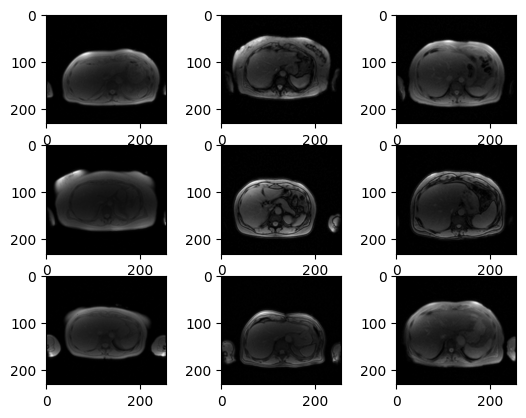

In [9]:
num_images = 9
mid_index = int(ref_df.shape[0]/2) + 10
med_paths = ref_df["numpy_dark_paths"][mid_index: mid_index + num_images].values
print(med_paths)
median_image_data = get_images(num_images, med_paths, slice_index=0)
plot_3by3(median_image_data)

# Analyze data

Max: 44.3
Min: 0.8
Mean: 0.8
Median: 3.1
Stddev: 4.904367902525401


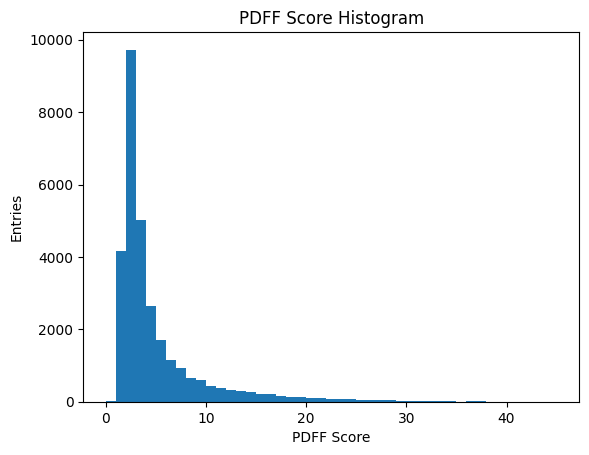

In [12]:
def get_stats(pdff_values, output_name = "tmp.png"):
    print(f"Max: {pdff_values.max()}")
    print(f"Min: {pdff_values.min()}")
    print(f"Mean: {pdff_values.min()}")
    print(f"Median: {np.median(pdff_values)}")
    print(f"Stddev: {pdff_values.std()}")
    #plt.hist(pdff_values, bins = [0,5,10,15,20,25,30,35,40]) 
    plt.hist(pdff_values, bins=range(0,46))
    plt.title("PDFF Score Histogram")
    plt.xlabel("PDFF Score")
    plt.ylabel("Entries")
    plt.savefig("images/PDFF_histogram.png")

get_stats(ref_df["PDFF"])